## Question1: Spectrogram of Audio File (25 points)
The purpose of this question is to record a audio file and plot the spectrogram

(a) First step is to record your voice in an audio file For doing this, use any tools, software or android apps that are available So, say a short sentence (like “My name is xxx”) and record the audio file

(b) Now write a code (use any language, but do not use any tool directly) that will read this audio file, and draw the spectrogram of that file Please feel free to consult any online resources to do so

(c) Now report what you can observe in this spectrogram?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from numpy.lib import stride_tricks

In [2]:
def stft(sdata, frame_size, overlap_factor=0.5, window=np.hanning):
    win = window(frame_size)
    hop_size = int(frame_size - np.floor(overlap_factor * frame_size))

    # Zero padding at the beginning
    samples = np.append(np.zeros(int(np.floor(frame_size/2.0))), sdata)

    no_of_frames = int(np.ceil((len(samples) - frame_size) / float(hop_size)) + 1)  # Convert cols to int
    samples = np.append(samples, np.zeros(frame_size))

    frames = stride_tricks.as_strided(samples, shape=(no_of_frames, frame_size), strides=(samples.strides[0] * hop_size, samples.strides[0])).copy()
    frames *= win

    return np.fft.rfft(frames)

# Logarithmic scaling of the frequency axis
def logScaling(fmatrix, sr=44100, factor=20.):
    timebins, freqbins = np.shape(fmatrix)

    scale = np.linspace(0, 1, freqbins) ** factor
    scale *= (freqbins - 1) / max(scale)
    scale = np.unique(np.round(scale)).astype(int)  # Ensure scale is int

    new_spectogram = np.complex128(np.zeros([timebins, len(scale)]))
    for i in range(len(scale)):
        if i == len(scale) - 1:
            new_spectogram[:, i] = np.sum(fmatrix[:, scale[i]:], axis=1)
        else:
            new_spectogram[:, i] = np.sum(fmatrix[:, scale[i]:scale[i + 1]], axis=1)

    all_frequencies = np.abs(np.fft.fftfreq(freqbins * 2, 1. / sr)[:freqbins + 1])
    frequencies = []
    for i in range(len(scale)):
        if i == len(scale) - 1:
            frequencies += [np.mean(all_frequencies[scale[i]:])]
        else:
            frequencies += [np.mean(all_frequencies[scale[i]:scale[i + 1]])]

    return new_spectogram, frequencies

def plot_amplitude_vs_time(sample_rate, audio_data):
    num_samples = len(audio_data)
    time_values = np.linspace(0, num_samples / sample_rate, num_samples)

    plt.figure(figsize=(10, 6))
    plt.plot(time_values, audio_data, color='blue')
    plt.title('Amplitude VS Time', fontsize=14, fontweight='bold')
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

def plotSpectogram(srate, sdata, db, freq, tbins, fbins, binsize=2**10, plotpath=None, colormap="jet"):
    plt.figure(figsize=(15, 7.5))
    plt.imshow(np.transpose(db), origin="lower", aspect="auto", cmap=colormap, interpolation="none")
    plt.colorbar()

    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.xlim([0, tbins - 1])
    plt.ylim([0, fbins])

    xlocs = np.float32(np.linspace(0, tbins - 1, 5))
    plt.xticks(xlocs, ["%.02f" % l for l in ((xlocs * len(sdata) / tbins) + (0.5 * binsize)) / srate])
    ylocs = np.int16(np.round(np.linspace(0, fbins - 1, 10)))
    plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])
    plt.title('Spectrogram', fontsize=14, fontweight='bold')
    plt.show()

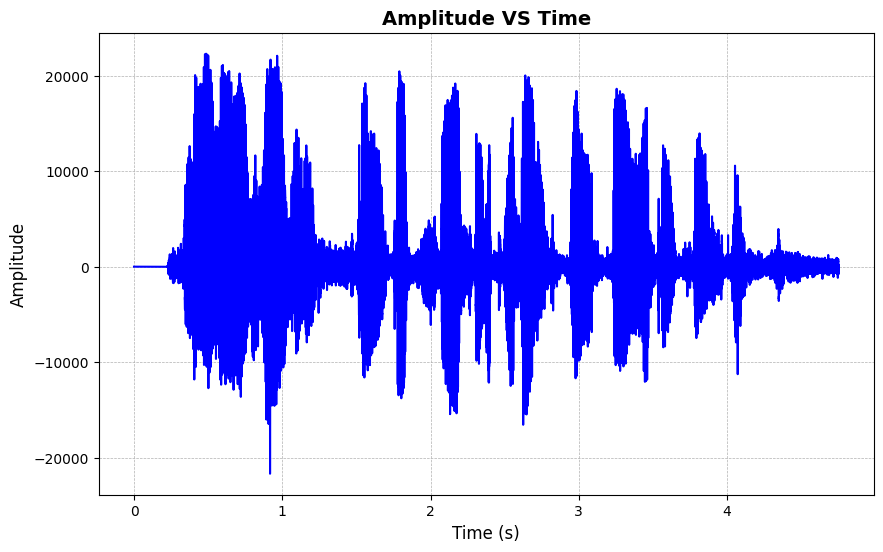

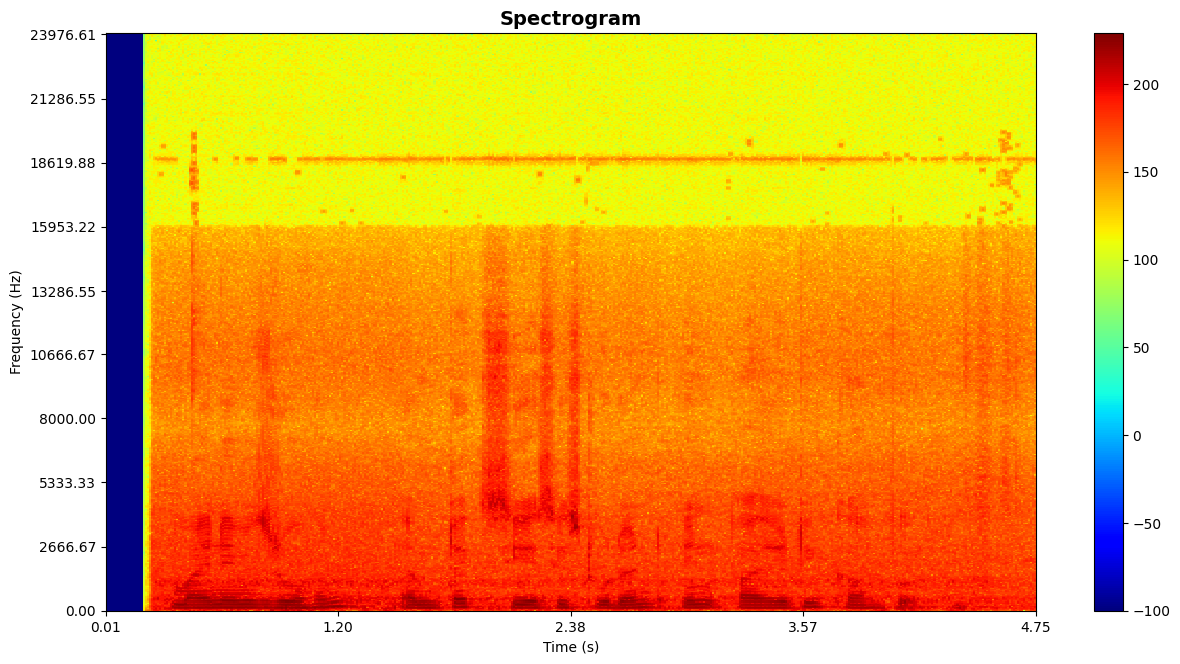

In [3]:
wav_file = 'Data Files/Audio.wav'
sample_rate, sample_data = wavfile.read(wav_file)

# If stereo, take only one channel
if len(sample_data.shape) == 2:
    sample_data = np.mean(sample_data, axis=1)

plot_amplitude_vs_time(sample_rate, sample_data)

stft_frame_size = 2**10

# Matrix where rows are time bins (frames), and columns are frequency bins for each frame
frequency_matrix = stft(sample_data, stft_frame_size)

new_spectogram, new_spectogram_frequencies = logScaling(frequency_matrix, factor=1.0, sr=sample_rate)

db_spectogram = 20. * np.log10(np.maximum(np.abs(new_spectogram), 1e-10) / 10e-6)

timebins, freqbins = np.shape(db_spectogram)

plotSpectogram(sample_rate, sample_data, db_spectogram, new_spectogram_frequencies, timebins, freqbins)

Audio.wav = "My name is Rohan MTech CSE in IIT Kanpur"
## Amplitude vs. Time Graph
1. Clear variations in amplitude can be observed after each word, indicating distinct speech segments. The words "Rohan," "MTech," "CSE," "student," "in," and "Kanpur" are clearly distinguishable based on these amplitude fluctuations.
2. Within words, there are noticeable amplitude variations that are emphasized or pronounced with greater force. For instance, the "CSE" and "IIT" segments might exhibit more pronounced peaks in amplitude due to their separate pronunciation.

## Spectrogram
1. The darker bottom region of the spectrogram indicates a relatively low noise floor, suggesting a clean recording environment with minimal background noise interference.
2. The darker red shades in the middle of the spectrogram represent the primary energy of the spoken words. These areas correspond to the frequency components associated with speech sounds.
3. The shape and distribution of these red regions can provide insights into the phonetic characteristics of the words. For example, vowels typically have a wider frequency band compared to consonants.
4. Sudden bursts of color intensity within the speech regions might indicate transient sounds like plosives or fricatives.

## Overall, the analysis suggests:

1. The audio is well-articulated, with distinct word boundaries and syllable emphasis.
2. The recording was likely made in a relatively quiet environment with minimal background noise interference.
3. The spectrogram provides valuable insights into the frequency content of the spoken words and their phonetic characteristics.